In [1]:
#imports
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model

# reflect the tables
Base=automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
m = session.query(Measurement).first()
m.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24a4d5c6dc0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [8]:
# Find the most recent date in the data set.
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date


('2017-08-23',)

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)
# Use Pandas Plotting with Matplotlib to plot the data


Query Date: 2016-08-22


In [10]:
# Perform a query to retrieve the data and precipitation scores
year_ago=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df1 = pd.DataFrame(year_ago, columns=['date','prcp'])
df1.rename(columns = {'prcp':'Precipitation'}, inplace = True)
df1.set_index('date', inplace=True)
df1.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

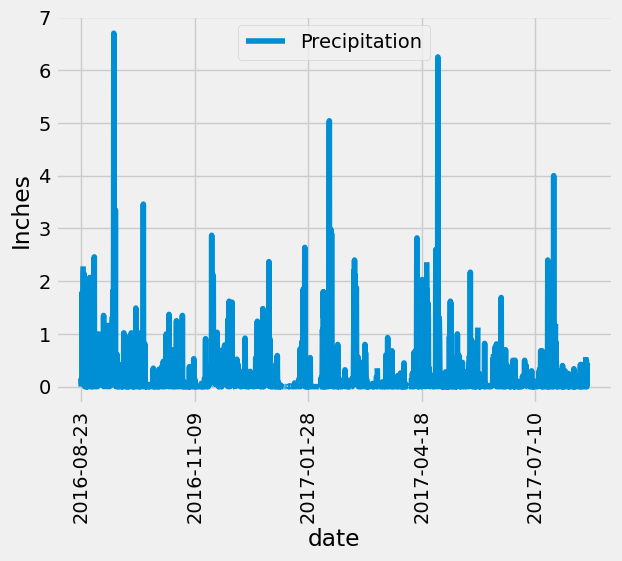

In [12]:
#plotting the precipitation and date
df1.plot().set_ylabel("Inches")
plt.xticks(rotation=90)

In [13]:
df1.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# example sample 
s = session.query(Measurement).first()
s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24a4d5c6dc0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [15]:
# number of stations
station_count = session.query(Station.id,).count()
station_count

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (session.query(Measurement.station,func.count(Measurement.station))\
                   .group_by(Measurement.station)\
                   .order_by(func.count(Measurement.station).desc()).all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
active_station_description = (session.query(func.min(Measurement.tobs),
                func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                   .filter(Measurement.station == most_active)).all()
active_station_description

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_temp = (session.query(Measurement.tobs)\
                .filter(Measurement.station == most_active)\
                .filter(Measurement.date >= '2016-08-23').all())
df2 = pd.DataFrame(last_12_months_temp, columns=['temp'])
df2.rename(columns = {'temp':'Temperature'}, inplace = True)
df2.set_index('Temperature')

""
Temperature
77.0
77.0
80.0
80.0
75.0
...
77.0
77.0
76.0


<AxesSubplot:ylabel='Frequency'>

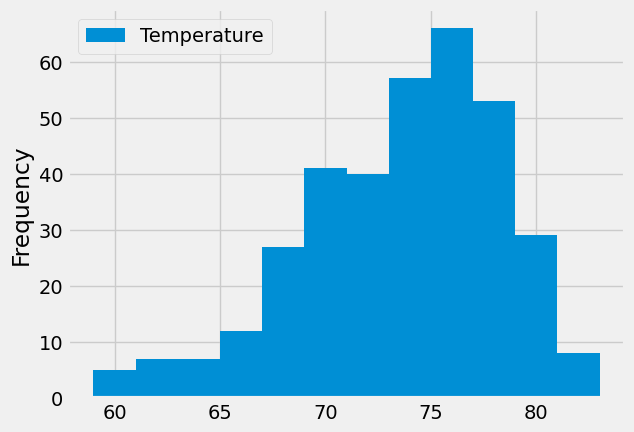

In [19]:
df2.plot.hist(bins = 12)

In [20]:
session.close()